In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import os
import seaborn as sns
import pandas as pd

In [2]:
def parse_ping(txt_file, ignore_time = None):
    with open(txt_file, 'r') as f:
        txt = f.read()
    time_arr = []
    for line in txt.strip().split('\n'):
        time = None
        icmp_seq = 'icmp_seq='
        if (icmp_seq in line):
            temp1 = line[line.index(icmp_seq) + len(icmp_seq):]
            time = int(temp1[:temp1.index(' ')])
        if (ignore_time is not None and time is not None and time <= ignore_time):
            try:
                temp = float(line[line.index("time=") + 5:].replace(' ms', ''))
                time_arr += [temp]
            except:
                continue
    return np.array(time_arr)

def parse_server(txt_file):
    with open(txt_file, 'r') as f:
        txt = f.read()
    temp = re.sub(' +', ' ', txt.strip())
    string_index_retr = '[ ID] Interval Transfer Bitrate Retr'
    string_index = '[ ID] Interval Transfer Bitrate'
    if (string_index_retr in temp):
        temp2 = temp[temp.index(string_index_retr) + len(string_index_retr):]
        temp3 = temp2[temp2.index(string_index_retr) + len(string_index_retr):].strip().split('\n')[0].split(' ')
    else:
        temp2 = temp[temp.index(string_index) + len(string_index):]
        temp3 = temp2[temp2.index(string_index) + len(string_index):].strip().split('\n')[0].split(' ')
    if (temp3[5].strip() == 'MBytes'):
        return float(temp3[4]) / 1000.
    return float(temp3[4])

## Observation 1

In [3]:
bbr_server = pd.DataFrame([], columns = ['queueSize', 'BBR Server Throughput'])
cubic_server = pd.DataFrame([], columns = ['queueSize', 'Cubic Server Throughput'])
for file_name in os.listdir('results/q4obs1'):
    file_path = os.path.join('results/q4obs1', file_name)
    if ('h6_client' in file_name):
        y_label = int(file_name.split('_')[-1])
        temp = pd.DataFrame([[y_label, parse_server(file_path)]], columns = ['queueSize', 'Cubic Server Throughput'])
        cubic_server = pd.concat([cubic_server, temp])
    elif ('h7_client' in file_name):
        y_label = int(file_name.split('_')[-1])
        temp = pd.DataFrame([[y_label, parse_server(file_path)]], columns = ['queueSize', 'BBR Server Throughput'])
        bbr_server = pd.concat([bbr_server, temp])

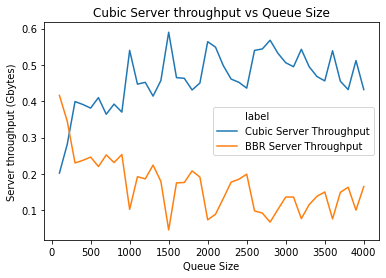

In [4]:
merged = pd.melt(cubic_server.merge(bbr_server), ['queueSize']).rename(columns = {'variable':'label', 'value':'y'})
ax = sns.lineplot(x='queueSize', y='y', hue='label', data=merged)
ax.set(xlabel='Queue Size', ylabel='Server throughput (Gbytes)', title='Cubic Server throughput vs Queue Size')
#plt.legend(labels=['H1 Server Throughput', 'H4 Server Throughput'])
plt.show()

In [5]:
bbr_server = pd.DataFrame([], columns = ['queueSize', 'BBR Server Throughput'])
cubic_server = pd.DataFrame([], columns = ['queueSize', 'Cubic Server Throughput'])
for file_name in os.listdir('results/q4obs1zoom'):
    file_path = os.path.join('results/q4obs1zoom', file_name)
    if ('h6_client' in file_name):
        y_label = int(file_name.split('_')[-1])
        temp = pd.DataFrame([[y_label, parse_server(file_path)]], columns = ['queueSize', 'Cubic Server Throughput'])
        cubic_server = pd.concat([cubic_server, temp])
    elif ('h7_client' in file_name):
        y_label = int(file_name.split('_')[-1])
        temp = pd.DataFrame([[y_label, parse_server(file_path)]], columns = ['queueSize', 'BBR Server Throughput'])
        bbr_server = pd.concat([bbr_server, temp])

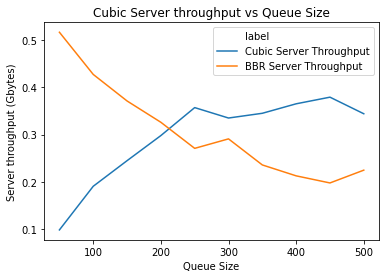

In [6]:
merged = pd.melt(cubic_server.merge(bbr_server), ['queueSize']).rename(columns = {'variable':'label', 'value':'y'})
ax = sns.lineplot(x='queueSize', y='y', hue='label', data=merged)
ax.set(xlabel='Queue Size', ylabel='Server throughput (Gbytes)', title='Cubic Server throughput vs Queue Size')
#plt.legend(labels=['H1 Server Throughput', 'H4 Server Throughput'])
plt.show()

## Observation 2

In [7]:
bbr_server = pd.DataFrame([], columns = ['bandwidth', 'BBR Server Throughput'])
bbr_ping_mean = pd.DataFrame([], columns = ['bandwidth', 'BBR Ping Mean'])
bbr_ping_max = pd.DataFrame([], columns = ['bandwidth', 'BBR Ping Max'])
cubic_server = pd.DataFrame([], columns = ['bandwidth', 'Cubic Server Throughput'])
cubic_ping_mean = pd.DataFrame([], columns = ['bandwidth', 'Cubic Ping Mean'])
cubic_ping_max = pd.DataFrame([], columns = ['bandwidth', 'Cubic Ping Max'])

for file_name in os.listdir('results/q4obs2'):
    file_path = os.path.join('results/q4obs2', file_name)
    if ('bbr' in file_name):
        y_label = int(file_name.split('_')[-1])
        if ('server' in file_name):
            temp = pd.DataFrame([[y_label, parse_server(file_path)]], columns = ['bandwidth', 'BBR Server Throughput'])
            bbr_server = pd.concat([bbr_server, temp])
        elif ('ping' in file_name):
            temp = pd.DataFrame([[y_label, parse_ping(file_path, 120).mean()]], columns = ['bandwidth', 'BBR Ping Mean'])
            bbr_ping_mean = pd.concat([bbr_ping_mean, temp])
            temp = pd.DataFrame([[y_label, parse_ping(file_path, 120).max()]], columns = ['bandwidth', 'BBR Ping Max'])
            bbr_ping_max = pd.concat([bbr_ping_max, temp])
    if ('cubic' in file_name):
        y_label = int(file_name.split('_')[-1])
        if ('server' in file_name):
            temp = pd.DataFrame([[y_label, parse_server(file_path)]], columns = ['bandwidth', 'Cubic Server Throughput'])
            cubic_server = pd.concat([cubic_server, temp])
        elif ('ping' in file_name):
            temp = pd.DataFrame([[y_label, parse_ping(file_path, 120).mean()]], columns = ['bandwidth', 'Cubic Ping Mean'])
            cubic_ping_mean = pd.concat([cubic_ping_mean, temp])
            temp = pd.DataFrame([[y_label, parse_ping(file_path, 120).max()]], columns = ['bandwidth', 'Cubic Ping Max'])
            cubic_ping_max = pd.concat([cubic_ping_max, temp])

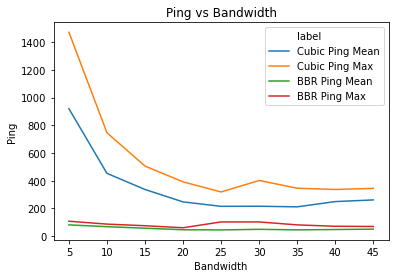

In [8]:
merged = pd.melt(cubic_ping_mean.merge(cubic_ping_max).merge(bbr_ping_mean.merge(bbr_ping_max)), ['bandwidth']).rename(columns = {'variable':'label', 'value':'y'})
ax = sns.lineplot(x='bandwidth', y='y', hue='label', data=merged)
ax.set(xlabel='Bandwidth', ylabel='Ping', title='Ping vs Bandwidth')
plt.show()